In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import datasets
from datasets import load_dataset
from datasets import Dataset
from tqdm.auto import tqdm
from itertools import chain
import datamol as dm
import safe as sf

In [13]:
toy_dt = datasets.load_dataset("/storage/shared_data/manu/processed_unichem/", split="test[:100000]")

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Found cached dataset arrow (/home/emmanuel/.cache/huggingface/datasets/arrow/processed_unichem-f0e43c1679512fb4/0.0.0/74f69db2c14c2860059d39860b1f400a03d11bf7fb5a8258ca38c501c878c137)


In [ ]:
ClP1OCCCCCCO1
O=c1oc2ccccc2c(F)c1Br
[Si]=C1C=CC=C1BrC1=C2CCc3ccc(Br)c4c3C2C(C=C1)CC4

deque([[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}]])


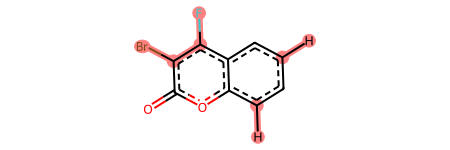

[]

In [55]:
out = sf.trainer.utils.fragment_aware_spliting(dm.to_mol("O=c1oc2ccccc2c(F)c1Br"), fraction_hs=0.4)
out

In [103]:
mol = dm.to_mol("CCCCCCCC")
sf.trainer.utils.convert_to_safe(mol, seed=1221, fraction_hs=0.1, resolution=1)

'CC2.C2C1.C1CCC'

In [121]:
def batched_mapping(batch):
    out = {}
    if isinstance(batch["smiles"], (list, tuple)):
        safe_encoding = [sf.trainer.utils.convert_to_safe(x) for x in batch["smiles"]]
        non_null_pos = [i for i in range(len(batch["smiles"])) if safe_encoding[i] is not None]
        out["safe"] = [safe_encoding[i] for i in non_null_pos]
        for k in batch.keys():
            out[k] = [batch[k][i] for i in non_null_pos]
        return out
    else:
        return {'safe': sf.trainer.utils.convert_to_safe(batch["smiles"])}

In [ ]:
toy_dt.map(batched_mapping, batch_size=500, num_proc=32, batched=True)

In [116]:
tmp_df = toy_dt.filter(lambda x: x["smiles"] is not None and '.' not in x["smiles"])

Filter:   0%|          | 0/100000 [00:00<?, ? examples/s]

In [127]:
out = tmp_df.map(batched_mapping, num_proc=32, batched=True, batch_size=5000)

Map (num_proc=32):   0%|          | 0/95393 [00:00<?, ? examples/s]

In [128]:
out

Dataset({
    features: ['id', 'smiles', 'source', 'safe'],
    num_rows: 94904
})

In [129]:
tmp_df = out.filter(lambda x: x["safe"] is not None)

Filter:   0%|          | 0/94904 [00:00<?, ? examples/s]

In [130]:
tmp_df

Dataset({
    features: ['id', 'smiles', 'source', 'safe'],
    num_rows: 94904
})

In [132]:
tmp_df[100]


{'id': '169616212',
 'smiles': 'CC(C)(C)[N+]1(C(=O)[O-])C2COCC1C[N+](Cc1ccccc1)(C(=O)[O-])C2',
 'source': 'unichem',
 'safe': 'CC6(C)C.[N+]176C2COCC1C[N+]53C2.C7(=O)[O-].C34.c14ccccc1.C5(=O)[O-]'}